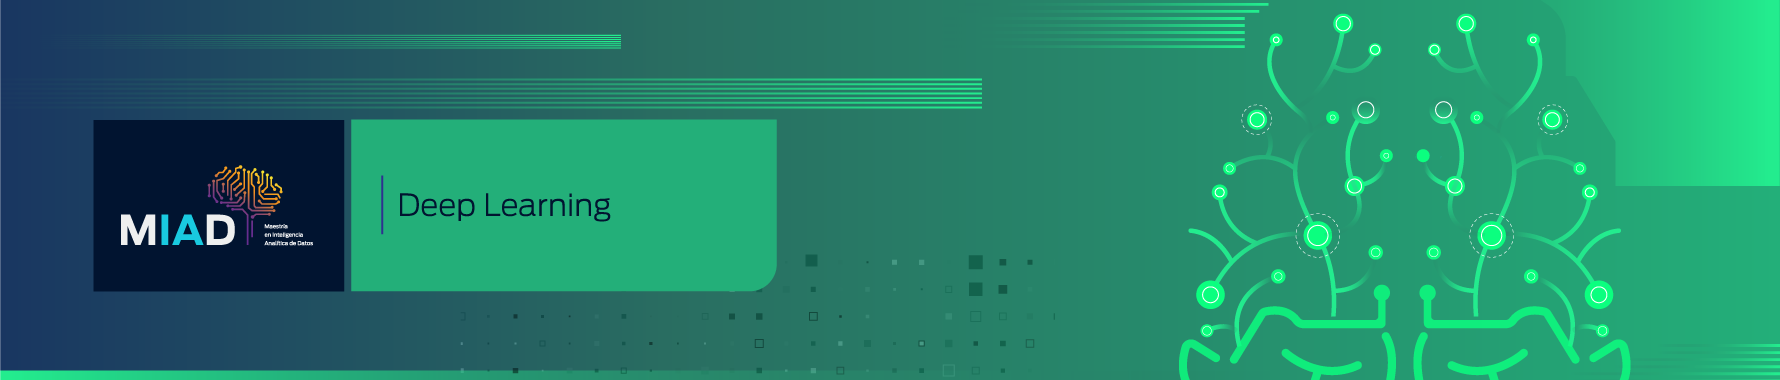

# Estrategias de implementación

## Redes neuronales usando Keras: Implementación en contexto real usando Keras

## Actividad calificada por el personal

### Propósito 

En el laboratorio "Estimación de red neuronal con múltiples capas" se propuso una implementación manual de redes neuronales usando librerías básicas de python como lo son *pandas* y *numpy*. *Google* desarrolló un *API* para el aprendizaje automático cuyo nombre es *"Keras"*, esta es escrita en *python* y es utilizada para hacer implementaciones de redes neuronales simples.

Así, en este *notebook* se pretende evaluar el uso de *keras* al aplicar una red neuronal en un contexto real. 

### Instrucciones generales

1. Para desarrollar el notebook, lo deberán descargar a un repositorio (pueden escoger el repositorio de su preferencia) para que lo puedan trabajar grupalmente.

2. Los procedimientos en el notebook deberán responderse en los espacios especificados para tal fin, debajo de cada uno de los puntos.

3. Para que la actividad sea calificada, deberán subir únicamente este mismo archivo con la extensión ".ipynb" a la actividad de "entrega calificada por el personal" correspondiente a este caso.

4. El archivo que suban debe poder ejecutarse localmente cuando sea descargado por el tutor, asumiendo que la base de datos de la actividad ya ha sido importada en el correspondiente archivo separado por comas (.csv).

### Criterios a evaluar

Los criterios que se evaluarán son:

Análisis preliminar de variables: Se presentan correlogramas, histogramas y estadísticas descriptivas de las variables de la base de datos y se hace un análisis coherente de cada uno de ellos. [30 puntos]

Estimación de un modelo utilizando redes neuronales: Se estima el modelo usando una red neuronal, se evalúa en la muestra de test y se analizan correctamente los resultados y el procedimiento realizado [30 puntos]

Elección del mejor modelo: Se elige la mejor combinación de hiperparámetros de acuerdo a los resultados obtenidos y justifica adecuadamente la selección. [40 puntos]


#### Problema

Un *manager* de un banco manifiesta preocupación porque los clientes están renunciando a las tarjetas de crédito. Este cuenta con los datos disponibles en 
https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers a cerca de 10000 clientes, si tiene productos activos o no (*"Attrition flag"*), en función de variables tales como edad, salario, estado civil, límite de tarjeta de crédito, categoría de tarjeta de crédito, etc.

Ustedes deben proponer el algoritmo para hacer la clasificación de los clientes con una red neuronal.

Tengan en cuenta que, para resolver los puntos de esta actividad, únicamente deben considerar las variables continuas (se deben eliminar las variables categóricas) y deberán eliminar las observaciones con datos faltantes.


### Librerías a importar

In [2]:
from math import exp
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
import seaborn as sns
import time

c:\Users\Usuario\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


### 1. Análisis preliminar de variables [30 puntos]

Realicen un análisis preliminar de los predictores y de la variable de respuesta (correlogramas, histogramas y estadísticas descriptivas).

In [14]:
# Utilicen este espacio para escribir los códigos del procedimiento del punto 1 ####
df = pd.read_csv("BankChurners.csv")
print(f'Tamaño Inicial: Filas {df.shape[0]} - Columnas {df.shape[1]}')
df = df.drop(columns=['CLIENTNUM', 
                      'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
                      'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'])

df['Attrition_Flag'] = df['Attrition_Flag'].map({'Attrited Customer': 1, 'Existing Customer': 0})
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
df = df.drop(columns=categorical_cols)
df

Tamaño Inicial: Filas 10127 - Columnas 23


,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,0,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,0,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0,50,2,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,1,41,2,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,1,44,1,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,1,30,2,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [4]:
df.describe()

,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,0.160660,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,0.367235,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,0.000000,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,0.000000,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,0.000000,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,0.000000,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,1.000000,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  int64  
 1   Customer_Age              10127 non-null  int64  
 2   Dependent_count           10127 non-null  int64  
 3   Months_on_book            10127 non-null  int64  
 4   Total_Relationship_Count  10127 non-null  int64  
 5   Months_Inactive_12_mon    10127 non-null  int64  
 6   Contacts_Count_12_mon     10127 non-null  int64  
 7   Credit_Limit              10127 non-null  float64
 8   Total_Revolving_Bal       10127 non-null  int64  
 9   Avg_Open_To_Buy           10127 non-null  float64
 10  Total_Amt_Chng_Q4_Q1      10127 non-null  float64
 11  Total_Trans_Amt           10127 non-null  int64  
 12  Total_Trans_Ct            10127 non-null  int64  
 13  Total_Ct_Chng_Q4_Q1       10127 non-null  float64
 14  Avg_Ut

In [6]:
df.isna().sum()

Attrition_Flag              0
Customer_Age                0
Dependent_count             0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [7]:
missing_percentage = df.isna().sum() / len(df) * 100
print(missing_percentage)

Attrition_Flag              0.0
Customer_Age                0.0
Dependent_count             0.0
Months_on_book              0.0
Total_Relationship_Count    0.0
Months_Inactive_12_mon      0.0
Contacts_Count_12_mon       0.0
Credit_Limit                0.0
Total_Revolving_Bal         0.0
Avg_Open_To_Buy             0.0
Total_Amt_Chng_Q4_Q1        0.0
Total_Trans_Amt             0.0
Total_Trans_Ct              0.0
Total_Ct_Chng_Q4_Q1         0.0
Avg_Utilization_Ratio       0.0
dtype: float64


In [8]:
cols = 5
rows = len(df.columns) // cols + (len(df.columns) % cols > 0)
fig = make_subplots(rows=rows, cols=cols, subplot_titles=df.columns)
for i, column in enumerate(df.columns):
    row = i // cols + 1
    col = i % cols + 1
    fig.add_trace(
        go.Histogram(x=df[column], name=column),
        row=row, col=col
    )
fig.update_layout(height=300 * rows, width=1000, title_text="Histogramas de las Variables")
fig.show()

In [9]:
corr = df.corr()

fig = ff.create_annotated_heatmap(
    z=corr.values,
    x=corr.columns.tolist(),
    y=corr.columns.tolist(),
    annotation_text=corr.round(2).values,
    colorscale='Earth',
    showscale=True
)

fig.update_layout(
    title='Matriz de Correlación Interactiva',
    xaxis=dict(tickangle=45),
    yaxis=dict(tickangle=0),
    width=800,
    height=800
)

fig.show()

#### Conclusiones del análisis preliminar de variables

1. El dataset inicial estaba compuesto por 10.127 registros y 23 columnas, contenía variables categóricas además, de que tres de estas variables tanto el dataset de Kaggle precisó que no deberían tomarse en cuenta (2 columnas al final) y el ID de cada cliente. Por tanto, se eliminaron esas 3 columnas, para posteriormente la variable a predecir "Attrition_Flag" convertir a 1 y 0 y sobre este nuevo conjunto de datos, eliminar las variables categóricas conforme las indicaciones del notebook.
2. Se realizó un análisis de calidad de datos, buscando valores faltantes y no se encontraron y si bien en los histogramas se observaron valores altos y bajos en ciertas variables, se tomó la decisión de incluir todas y a través del modelo de red neuronal evaluar su contribución al modelo.
3. Mediante la matriz de correlación se puede observar que las variables más correlacionadas serían "Total_Trans_Ct", "Total_CT_Chng_Q4_Q1", "Total_Revolving_Bal", "Contacts_Count_12_mom" y "Months_Inactive_12_mon".

### 2. Estimación del modelo usando una red neuronal con keras [30 puntos]

Estimen un modelo predictivo usando la muestra de entrenamiento y evalúen su desempeño en test con hiperparámetros de su selección.

In [15]:
X = df.drop('Attrition_Flag', axis=1)
y = df['Attrition_Flag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
start = time.time()
history = model.fit(X_train, y_train, epochs=50, batch_size=10, validation_data=(X_test, y_test))
end = time.time()

Epoch 1/50
709/709 [==============================] - 2s 2ms/step - loss: 0.2720 - accuracy: 0.8885 - val_loss: 0.2182 - val_accuracy: 0.9138
Epoch 2/50
709/709 [==============================] - 1s 2ms/step - loss: 0.1890 - accuracy: 0.9259 - val_loss: 0.1857 - val_accuracy: 0.9240
Epoch 3/50
709/709 [==============================] - 1s 2ms/step - loss: 0.1688 - accuracy: 0.9317 - val_loss: 0.1722 - val_accuracy: 0.9306
Epoch 4/50
709/709 [==============================] - 1s 2ms/step - loss: 0.1552 - accuracy: 0.9355 - val_loss: 0.1677 - val_accuracy: 0.9339
Epoch 5/50
709/709 [==============================] - 1s 2ms/step - loss: 0.1495 - accuracy: 0.9398 - val_loss: 0.1651 - val_accuracy: 0.9375
Epoch 6/50
709/709 [==============================] - 1s 2ms/step - loss: 0.1435 - accuracy: 0.9416 - val_loss: 0.1620 - val_accuracy: 0.9345
Epoch 7/50
709/709 [==============================] - 1s 2ms/step - loss: 0.1369 - accuracy: 0.9444 - val_loss: 0.1587 - val_accuracy: 0.9378
Epoch 

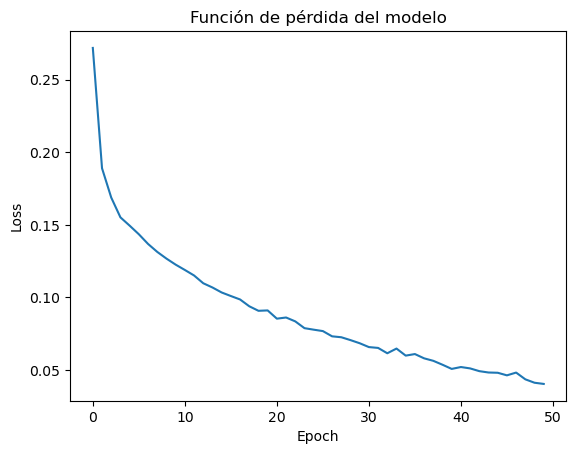

Tiempo de ejecución: 62.80254364013672
95/95 - 0s - loss: 0.1903 - accuracy: 0.9424 - 113ms/epoch - 1ms/step

Test accuracy: 0.9424152970314026


In [16]:
plt.plot(history.history['loss'])
plt.title('Función de pérdida del modelo')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()
print("Tiempo de ejecución: " + str(end - start))
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

#### Comentarios:

### Procedimiento:

* Se seleccionaron únicamente las variables numéricas del conjunto conjunto de datos.
* Se dividió el conjunto de datos en conjuntos de entrenamiento y pruebas
* Para asegurarnos que todas las variables tengan escalas similares se normalizaron las variables.
* Se construyó el modelo de red neurona con tres capas densamente conectadas, con activación 'relu' en las dos primeras capas y 'sigmoid' en la capa de salida, ya que se trata de un problema de clasificación binaria.
* Se compiló el modelo utilizando el optimizador 'adam' y la función de pérdida 'binary_crossentropy'.

### Resultado :

* La precisión del modelo en el conjunto de prueba es del 94.34%. Esto significa que el modelo fue capaz de clasificar correctamente el 94.34% de los casos en el conjunto de prueba, lo que quiere decir que si el modelo logra una alta precisión en la clasificación de los clientes que abandonan las tarjetas de crédito, esto permitiria ayudar al banco a identificar y retener a los clientes en riesgo de abandonar. 

### 3. Elección del mejor modelo [40 puntos]

Ahora construyan una función que reciba por parámetro una lista de número de capas a utilizar,  números de neuronas por capa, así como funciones de activación a utilizar.

Dicha función debe entrenar el modelo con los datos de entrenamiento, evaluar con los datos de prueba para cada una de las combinaciones de hiperparámetros y encontrar cuál es la mejor combinación de hiperprámetros.  

Una vez hecho este procedimiento respondan a la siguiente pregunta:
 
¿Cómo argumenta que esta sea la selección óptima de hiperparámetros?

Tested configuration: Layers=1, Neurons=20, Activation=sigmoid, Accuracy=0.9329
Tested configuration: Layers=1, Neurons=20, Activation=relu, Accuracy=0.9411
Tested configuration: Layers=1, Neurons=20, Activation=softplus, Accuracy=0.9316
Tested configuration: Layers=1, Neurons=20, Activation=softsign, Accuracy=0.9362
Tested configuration: Layers=1, Neurons=20, Activation=tanh, Accuracy=0.9460
Tested configuration: Layers=1, Neurons=20, Activation=selu, Accuracy=0.9368
Tested configuration: Layers=1, Neurons=20, Activation=elu, Accuracy=0.9362
Tested configuration: Layers=2, Neurons=20, Activation=sigmoid, Accuracy=0.9404
Tested configuration: Layers=2, Neurons=20, Activation=relu, Accuracy=0.9470
Tested configuration: Layers=2, Neurons=20, Activation=softplus, Accuracy=0.9411
Tested configuration: Layers=2, Neurons=20, Activation=softsign, Accuracy=0.9464
Tested configuration: Layers=2, Neurons=20, Activation=tanh, Accuracy=0.9539
Tested configuration: Layers=2, Neurons=20, Activation=

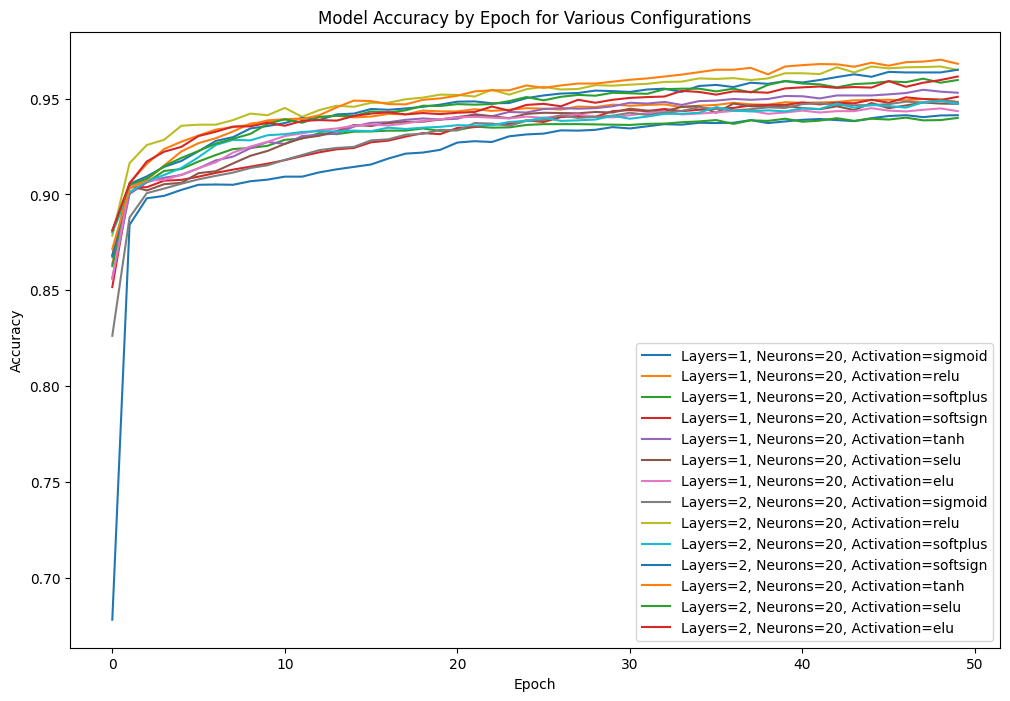

Best configuration: Layers=2, Neurons=20, Activation=tanh, Accuracy=0.9539


In [12]:
def test_network_configurations(layer_counts, neurons_per_layer, activation_functions, X_train, X_test, y_train, y_test):
    best_accuracy = 0
    best_configuration = None
    all_histories = []

    for layer_count in layer_counts:
        for neurons in neurons_per_layer:
            for activation in activation_functions:
                model = Sequential()
                model.add(Dense(neurons, input_dim=X_train.shape[1], activation=activation))
                for _ in range(1, layer_count):
                    model.add(Dense(neurons, activation=activation))
                model.add(Dense(1, activation='sigmoid'))
                model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
                history = model.fit(X_train, y_train, epochs=50, batch_size=10, verbose=0, validation_data=(X_test, y_test))
                loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
                if accuracy > best_accuracy:
                    best_accuracy = accuracy
                    best_configuration = (layer_count, neurons, activation)
                all_histories.append((history, f"Layers={layer_count}, Neurons={neurons}, Activation={activation}"))
                print(f'Tested configuration: Layers={layer_count}, Neurons={neurons}, Activation={activation}, Accuracy={accuracy:.4f}')
    plt.figure(figsize=(12, 8))
    for history, label in all_histories:
        plt.plot(history.history['accuracy'], label=label)

    plt.title('Model Accuracy by Epoch for Various Configurations')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()

    print(f'Best configuration: Layers={best_configuration[0]}, Neurons={best_configuration[1]}, Activation={best_configuration[2]}, Accuracy={best_accuracy:.4f}')
    return best_configuration, best_accuracy

layer_counts = [1,2]
neurons_per_layer = [20]
activation_functions = ['sigmoid', 'relu', 'softplus', 'softsign', 'tanh', 'selu', 'elu']

best_config, best_acc = test_network_configurations(layer_counts, neurons_per_layer, activation_functions, X_train, X_test, y_train, y_test)

### Comentarios:

1. Se creo una funcion que recibe como parámetros las funciones de activación, la cantidad de neuronas  y la cantidad de capas, esta función tiene la capacidad de evaluar y realizar las diferentes combinacionaes de parámetros al moento de realizar el entrenamiento de la red neuronal.

2. A nivel general podemos observar que incrementar las capas de 1 a 2, se obtiene una mejora en el modelo lo cual se refleja en el Accuracy. A nivel de 1 capa podemos observar la mejor configuración: Tested configuration: Layers=1, Neurons=20, Activation=tanh, Accuracy=0.9434; no obstante a nivel de 2 capas, la mejor cofiguración fue Tested configuration: Layers=2, Neurons=20, Activation=tanh, Accuracy=0.9566 que tiene un accuracy mejor.

3. Para la selección de hiperparámetros, se recomienda iniciar con dos capas y tanh como función de activación, dado que esta configuración ha demostrado la mayor eficacia en las pruebas realizadas. 